In [1]:
outdir <- "/data2/mito_lineage/Analysis/annotation/output/data"
prefix <- "CHIP_april08_2021_Croker/MTblacklist/"
singlecell_sumstats_dir <- "/data2/isshamie/mito_lineage/data/processed/mtscATAC/CHIP_april08_2021_Croker/MTblacklist/"
cellr_indir <- "/data2/isshamie/mito_lineage/data/processed/mtscATAC/CHIP_april08_2021_Croker/MTblacklist"
external_dat_dir <- "/data2/mito_lineage/Analysis/annotation/output/data/granja_cd34"
external_frag_file <- "granja_cd34.fragments.tsv"
external_prefix <- "GSE129785_scATAC-Hematopoiesis-CD34"

In [2]:
fragment_file <- file.path(external_dat_dir, external_frag_file)

In [3]:
genome_dir <- outdir
outdir <- file.path(outdir, prefix)
#dir.create(outdir, recursive=TRUE, showWarnings = TRUE)

In [4]:
if (FALSE){
    BiocManager::install("EnsDb.Hsapiens.v75")
    }

In [5]:
library(EnsDb.Hsapiens.v75)

library(Signac)
library(Seurat)
library(data.table)
library(dplyr)

library(umap)

Loading required package: ensembldb

Loading required package: BiocGenerics

Loading required package: parallel


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, basename, cbind, colnames,
    dirname, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, Map, mapply, match, mget,
    order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rownames, sapply, setdiff, sort, table, tapply,
    union, unique, unsplit, which.max, which.min


Loading required package: GenomicRanges

Loading required package: stats4

Loa

In [6]:
library(magrittr)
library(readr)
library(Matrix)
library(tidyr)
library(dplyr)



Attaching package: 'magrittr'


The following object is masked from 'package:AnnotationFilter':

    not



Attaching package: 'Matrix'


The following object is masked from 'package:S4Vectors':

    expand



Attaching package: 'tidyr'


The following objects are masked from 'package:Matrix':

    expand, pack, unpack


The following object is masked from 'package:magrittr':

    extract


The following object is masked from 'package:S4Vectors':

    expand




# Compute for external data

In [7]:
metadata <- read.csv(
  file = file.path(external_dat_dir, paste0(external_prefix, ".cell_barcodes.txt")),
  header = TRUE,
  sep='\t',
)
rownames(metadata) <- metadata$Group_Barcode
cell_names <- rownames(metadata)
metadata

UMAP1      UMAP2      Clusters 
Bone_Marrow_Rep1#CAAGAAAGTCAAGACG-1  -2.419656  7.603472  Cluster6 
Bone_Marrow_Rep1#AAAGGGCAGTACCCAT-1  -7.153399 -5.512960  Cluster11
Bone_Marrow_Rep1#CACAACATCGTGGGTC-1  -8.475636 -5.377475  Cluster9 
Bone_Marrow_Rep1#TTACCCGTCTGATCCC-1  -6.706686 12.041433  Cluster2 
Bone_Marrow_Rep1#CTTTGCGGTACGGTTT-1  -7.591989 -3.001234  Cluster9 
Bone_Marrow_Rep1#GGTTGCGCAGGGAGTT-1  -6.898403 11.516414  Cluster2 
Bone_Marrow_Rep1#GCTCAGGTCAGAATGA-1  -9.729723 -4.425398  Cluster9 
Bone_Marrow_Rep1#TTGCGAACAGGGTACA-1  -6.445809 12.357817  Cluster2 
Bone_Marrow_Rep1#CGGACCACAAGCAACG-1  -7.710368 -4.121327  Cluster9 
Bone_Marrow_Rep1#GAGCGCTGTGATCAGG-1 -10.635930  5.512935  Cluster1 
Bone_Marrow_Rep1#TACGGATAGCATGATA-1  -9.387129 -3.556348  Cluster9 
Bone_Marrow_Rep1#TGCTCACAGCGCATTT-1  -9.514290  3.969905  Cluster4 
Bone_Marrow_Rep1#GGATAGGTCAGGAATA-1  -7.568672 -5.607265  Cluster9 
Bone_Marrow_Rep1#CCTCCCTTCCACACCT-1  -8.549520  5.889779  Cluster3 
Bone_Marrow_Rep1#TCACAGAAGTAGTCGG-1  -6.701248 11.776750  Cluster2 
Bone_Marrow_Rep1#CTCTACGGTGTAGGAC-1  -7.651327 10.598859  Cluster2 
Bone_Marrow_Rep1#GTTACTTTCGCTAGTA-1  -9.309326 -1.345129  Cluster9 
Bone_Marrow_Rep1#TAAACCGTCGCTTCAC-1  -6.848573 11.317958  Cluster2 
Bone_Marrow_Rep1#CTTGCCAAGCGTCTGC-1  -6.759076 11.993876  Cluster2 
Bone_Marrow_Rep1#ACCAAACAGGATTGAT-1  -6.448473 12.351889  Cluster2 
Bone_Marrow_Rep1#ATTGTGGAGTGGACGT-1  -6.711315 11.685413  Cluster2 
Bone_Marrow_Rep1#CTCGCTATCACTAGCA-1  -9.854025  7.524247  Cluster1 
Bone_Marrow_Rep1#GCTTGCTCACTCCCAT-1  -6.355544 12.477963  Cluster2 
Bone_Marrow_Rep1#AGCTGGCCACACTAGT-1  -2.514253  7.825152  Cluster6 
Bone_Marrow_Rep1#GCAGCTGCAAGTAATG-1  -7.618873 -6.349810  Cluster11
Bone_Marrow_Rep1#AAATGCCGTGGAGTGT-1  -6.876202 11.423011  Cluster2 
Bone_Marrow_Rep1#GCAGCCACAGTAGGCA-1  -6.745661 11.997630  Cluster2 
Bone_Marrow_Rep1#AAACTCGCATGCCCTT-1  -7.027996 -5.753426  Cluster11
Bone_Marrow_Rep1#TTTGGTTCAAACTACC-1  -6.641901 12.112359  Cluster2 
Bone_Marrow_Rep1#TTGCTATTCGTCGCAG-1  -9.378706 -4.293174  Cluster9 
⋮                                   ⋮          ⋮          ⋮        
BM_pDC#160818_BM1137_pDC_LS_56      -7.407318  -1.3955335 Cluster9 
BM_pDC#160818_BM1137_pDC_LS_76      -6.071643  -0.8616032 Cluster10
BM_pDC#160818_BM1137_pDC_LS_66      -6.451665  -0.5284017 Cluster10
BM_pDC#160818_BM1137_pDC_LS_31      -6.131355  -0.4634687 Cluster10
BM_pDC#160818_BM1137_pDC_LS_32      -5.822127  -0.5408601 Cluster10
BM_pDC#160818_BM1137_pDC_LS_38      -6.141944  -0.8821916 Cluster10
BM_pDC#160818_BM1137_pDC_LS_3       -6.373333  -0.8405029 Cluster10
BM_pDC#160818_BM1137_pDC_LS_59      -7.408743  -2.0490739 Cluster9 
BM_pDC#160818_BM1137_pDC_LS_42      -6.832323  -1.1044367 Cluster10
BM_pDC#160818_BM1137_pDC_LS_10      -6.224089  -0.3834689 Cluster10
BM_pDC#160818_BM1137_pDC_LS_48      -6.419287  -0.3844965 Cluster10
BM_pDC#160818_BM1137_pDC_LS_44      -5.984088  -0.6665598 Cluster10
BM_pDC#160818_BM1137_pDC_LS_25      -6.636821  -0.8986220 Cluster10
BM_pDC#160818_BM1137_pDC_LS_23      -7.176690  -0.4409032 Cluster10
BM_pDC#160818_BM1137_pDC_LS_89      -6.408231  -0.3308168 Cluster10
BM_pDC#160818_BM1137_pDC_LS_77      -5.912319  -0.4907878 Cluster10
BM_pDC#160818_BM1137_pDC_LS_26      -5.522591  -0.8171158 Cluster10
BM_pDC#160818_BM1137_pDC_LS_9       -6.324114  -0.6060872 Cluster10
BM_pDC#160818_BM1137_pDC_LS_96      -6.250209  -0.3581452 Cluster10
BM_pDC#160818_BM1137_pDC_LS_60      -6.208796  -0.6821209 Cluster10
BM_pDC#160818_BM1137_pDC_LS_2       -5.512523  -0.8098684 Cluster10
BM_pDC#160818_BM1137_pDC_LS_43      -6.813495  -1.0771396 Cluster10
BM_pDC#160818_BM1137_pDC_LS_65      -6.110292  -0.3902481 Cluster10
BM_pDC#160818_BM1137_pDC_LS_86      -5.458284  -1.0672617 Cluster10
BM_pDC#160818_BM1137_pDC_LS_40      -5.885447  -0.8589974 Cluster10
BM_pDC#160818_BM1137_pDC_LS_70      -6.923321  -2.4885831 Cluster9 
BM_pDC#160818_BM1137_pDC_LS_35      -5.499443  -0.7178855 Cluster10
BM_pDC#160818_BM1137_pDC

In [8]:

# peak-bc matrix
mtx_path <- file.path(external_dat_dir, paste0(external_prefix, ".mtx"))
feature_path <- file.path(external_dat_dir, paste0(external_prefix, ".peaks.bed"))
barcode_path <- file.path(external_dat_dir, paste0(external_prefix, ".cell_barcodes.txt"))
 
features <- readr::read_tsv(feature_path, col_names = F) # %>% tidyr::unite(feature)
barcodes <- readr::read_tsv(barcode_path, col_names = F) # %>% tidyr::unite(barcode)
 

func.text <- function(x){ return(gsub('\\s+', '', paste0(x[1],":", x[2],"-", x[3])))}
featurenames <- apply(features, MARGIN=1, FUN=func.text)

featurenames

Registered S3 method overwritten by 'cli':
  method     from         
  print.boxx spatstat.geom

── Column specification ───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
cols(
  X1 = col_character(),
  X2 = col_double(),
  X3 = col_double()
)



── Column specification ───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
cols(
  X1 = col_character(),
  X2 = col_character(),
  X3 = col_character(),
  X4 = col_character(),
  X5 = col_character(),
  X6 = col_character(),
  X7 = col_character(),
  X8 = col_character(),
  X9 = col_character()
)




[1] "chr1:10238-10738"         "chr1:115476-115976"      
    [3] "chr1:236856-237356"       "chr1:237511-238011"      
    [5] "chr1:240801-241301"       "chr1:250084-250584"      
    [7] "chr1:540710-541210"       "chr1:710379-710879"      
    [9] "chr1:714861-715361"       "chr1:740068-740568"      
   [11] "chr1:751462-751962"       "chr1:752456-752956"      
   [13] "chr1:753161-753661"       "chr1:754821-755321"      
   [15] "chr1:755474-755974"       "chr1:756718-757218"      
   [17] "chr1:757321-757821"       "chr1:758120-758620"      
   [19] "chr1:760575-761075"       "chr1:761853-762353"      
   [21] "chr1:772975-773475"       "chr1:773621-774121"      
   [23] "chr1:775912-776412"       "chr1:776587-777087"      
   [25] "chr1:777435-777935"       "chr1:778028-778528"      
   [27] "chr1:778862-779362"       "chr1:779762-780262"      
   [29] "chr1:784830-785330"       "chr1:786685-787185"      
   [31] "chr1:791907-792407"       "chr1:793272-793772"      
   [33] "chr1:793931-794431"       "chr1:795397-795897"      
   [35] "chr1:796164-796664"       "chr1:800894-801394"      
   [37] "chr1:802870-803370"       "chr1:805029-805529"      
   [39] "chr1:810715-811215"       "chr1:811815-812315"      
   [41] "chr1:812817-813317"       "chr1:825947-826447"      
   [43] "chr1:827472-827972"       "chr1:829385-829885"      
   [45] "chr1:832604-833104"       "chr1:833145-833645"      
   [47] "chr1:834000-834500"       "chr1:837327-837827"      
   [49] "chr1:838106-838606"       "chr1:839236-839736"      
   [51] "chr1:839879-840379"       "chr1:840447-840947"      
   [53] "chr1:841430-841930"       "chr1:842023-842523"      
   [55] "chr1:845250-845750"       "chr1:847482-847982"      
   [57] "chr1:848145-848645"       "chr1:848854-849354"      
   [59] "chr1:849409-849909"       "chr1:850250-850750"      
   [61] "chr1:850764-851264"       "chr1:851288-851788"      
   [63] "chr1:852491-852991"       "chr1:853024-853524"      
   [65] "chr1:853904-854404"       "chr1:854879-855379"      
   [67] "chr1:855761-856261"       "chr1:856365-856865"      
   [69] "chr1:857314-857814"       "chr1:858392-858892"      
   [71] "chr1:859006-859506"       "chr1:859976-860476"      
   [73] "chr1:860797-861297"       "chr1:861781-862281"      
   [75] "chr1:862373-862873"       "chr1:863081-863581"      
   [77] "chr1:864097-864597"       "chr1:865001-865501"      
   [79] "chr1:865536-866036"       "chr1:866466-866966"      
   [81] "chr1:867084-867584"       "chr1:868999-869499"      
   [83] "chr1:870623-871123"       "chr1:871717-872217"      
   [85] "chr1:872615-873115"       "chr1:873436-873936"      
   [87] "chr1:873977-874477"       "chr1:874508-875008"      
   [89] "chr1:875489-875989"       "chr1:876049-876549"      
   [91] "chr1:876849-877349"       "chr1:877778-878278"      
   [93] "chr1:878386-878886"       "chr1:879700-880200"      
   [95] "chr1:880540-881040"       "chr1:881243-881743"      
   [97] "chr1:886721-887221"       "chr1:890844-891344"      
   [99] "chr1:892452-892952"       "chr1:893729-894229"      
  [101] "chr1:895100-895600"       "chr1:895702-896202"      
  [103] "chr1:896430-896930"       "chr1:897271-897771"      
  [105] "chr1:897954-898454"       "chr1:898673-899173"      
  [107] "chr1:899231-899731"       "chr1:900863-901363"      
  [109] "chr1:901552-902052"       "chr1:902136-902636"      
  [111] "chr1:902713-903213"       "chr1:903630-904130"      
  [113] "chr1:904142-904642"       "chr1:905833-906333"      
  [115] "chr1:906852-907352"       "chr1:907449-907949"      
  [117] "chr1:908130-908630"       "chr1:908841-909341"      
  [119] "chr1:909407-909907"       "chr1:910074-910574"      
  [121] "chr1:910772-911272"       "chr1:911354-911854"      
  [123] "chr1:913280-913780"       "chr1:913939-914439"      
  [125] "chr1:915754-916254"       "chr1:916584-917084"      
  [127] "chr1:917320-917820"       "chr1:917916-918416"      
  [129] "chr1:918504-919004"       "

In [9]:
mtx <- Matrix::readMM(mtx_path) %>%
  magrittr::set_rownames(featurenames) %>%
  magrittr::set_colnames(metadata$Group_Barcode)


In [10]:
mtx

   [[ suppressing 31 column names 'Bone_Marrow_Rep1#CAAGAAAGTCAAGACG-1', 'Bone_Marrow_Rep1#AAAGGGCAGTACCCAT-1', 'Bone_Marrow_Rep1#CACAACATCGTGGGTC-1' ... ]]

   [[ suppressing 31 column names 'Bone_Marrow_Rep1#CAAGAAAGTCAAGACG-1', 'Bone_Marrow_Rep1#AAAGGGCAGTACCCAT-1', 'Bone_Marrow_Rep1#CACAACATCGTGGGTC-1' ... ]]

   [[ suppressing 31 column names 'Bone_Marrow_Rep1#CAAGAAAGTCAAGACG-1', 'Bone_Marrow_Rep1#AAAGGGCAGTACCCAT-1', 'Bone_Marrow_Rep1#CACAACATCGTGGGTC-1' ... ]]



571389 x 18489 sparse Matrix of class "dgTMatrix"
                                                                                         
chr1:10238-10738     2 2 2 2 2 2 2 2 2 3 2 2 2 1 1 1 1 . . . . . . . . . . . . . . ......
chr1:115476-115976   . . . . . . . . . . . . . . . . . 2 2 2 2 . . . . . . . . . . ......
chr1:236856-237356   . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . ......
chr1:237511-238011   . . . . . . . . . . . . . 4 . . . . . . . 2 2 2 2 2 2 2 2 2 2 ......
chr1:240801-241301   . . 2 . . . . . . . . . . . . . . . . . . . . . . . . . . . . ......
chr1:250084-250584   . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . ......
chr1:540710-541210   . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . ......
chr1:710379-710879   . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . ......
chr1:714861-715361   . . . . . . . . . . . . . 2 . . . . . . . . . . . . . . . . . ......
chr1:740068-740568   . . . . . . . . . . . . . . .

In [11]:
sort_cmd = paste0("sort -k1,1 -k2,2n ", fragment_file, "", " > ", fragment_file)
gzip_cmd = paste0("bgzip ", fragment_file, " > ", fragment_file, ".gz")
tabix_cmd = paste0("tabix -p bed ", fragment_file, ".gz")
print(sort_cmd)
print(gzip_cmd)
print(tabix_cmd)

[1] "sort -k1,1 -k2,2n /data2/mito_lineage/Analysis/annotation/output/data/granja_cd34/granja_cd34.fragments.tsv > /data2/mito_lineage/Analysis/annotation/output/data/granja_cd34/granja_cd34.fragments.tsv"
[1] "bgzip /data2/mito_lineage/Analysis/annotation/output/data/granja_cd34/granja_cd34.fragments.tsv > /data2/mito_lineage/Analysis/annotation/output/data/granja_cd34/granja_cd34.fragments.tsv.gz"
[1] "tabix -p bed /data2/mito_lineage/Analysis/annotation/output/data/granja_cd34/granja_cd34.fragments.tsv.gz"


In [12]:
chrom_assay <- CreateChromatinAssay(
  counts = mtx,
  sep = c(":", "-"),
  genome = 'hg38',
  fragments = gsub('.fragments.tsv', '.fragments.sort.tsv.gz', fragment_file),
  min.cells = 10,
  min.features = 200
)


Computing hash



In [13]:
saveRDS(chrom_assay, file.path(outdir, "granja_10X_CD34_chromAssay.rds"))



In [14]:
cd34 <- CreateSeuratObject(
  counts = chrom_assay,
  assay = "peaks",
  meta.data = metadata,
  project = "External",
)

In [15]:
# extract gene annotations from EnsDb
annotations <- GetGRangesFromEnsDb(ensdb = EnsDb.Hsapiens.v75, biotypes = "protein_coding")
seqlevelsStyle(annotations) <- 'UCSC'
genome(annotations) <- "hg38"

Fetching data...
OK

Parsing exons...
OK
Defining introns...
OK
Defining UTRs...
OK
Defining CDS...
OK

aggregating...

Done

Fetching data...
OK

Parsing exons...
OK
Defining introns...
OK
Defining UTRs...
OK
Defining CDS...
OK

aggregating...

Done

Fetching data...
OK

Parsing exons...
OK
Defining introns...
OK
Defining UTRs...
OK
Defining CDS...
OK

aggregating...

Done

Fetching data...
OK

Parsing exons...
OK
Defining introns...
OK
Defining UTRs...
OK
Defining CDS...
OK

aggregating...

Done

Fetching data...
OK

Parsing exons...
OK
Defining introns...
OK
Defining UTRs...
OK
Defining CDS...
OK

aggregating...

Done

Fetching data...
OK

Parsing exons...
OK
Defining introns...
OK
Defining UTRs...
OK
Defining CDS...
OK

aggregating...

Done

Fetching data...
OK

Parsing exons...
OK
Defining introns...
OK
Defining UTRs...
OK
Defining CDS...
OK

aggregating...

Done

Fetching data...
OK

Parsing exons...
OK
Defining introns...
OK
Defining UTRs...
OK
Defining CDS...
OK

aggregating...

In [16]:
Annotation(cd34) <- annotations

In [17]:
gene.activities <- GeneActivity(cd34)

# add the gene activity matrix to the Seurat object as a new assay and normalize it
cd34[['RNA']] <- CreateAssayObject(counts = gene.activities)
cd34 <- NormalizeData(
  object = cd34,
  assay = 'RNA',
  normalization.method = 'LogNormalize',
  scale.factor = median(cd34$nCount_RNA)
)

Extracting gene coordinates

Extracting reads overlapping genomic regions

Warning message:
"Non-unique features (rownames) present in the input matrix, making unique"


In [18]:
cd34

An object of class Seurat 
586167 features across 18489 samples within 2 assays 
Active assay: peaks (566210 features, 0 variable features)
 1 other assay present: RNA

In [19]:
cd34 <- RunTFIDF(cd34)
cd34 <- FindTopFeatures(cd34, min.cutoff = 'q0')
cd34 <- RunSVD(cd34)

Performing TF-IDF normalization

Running SVD

Scaling cell embeddings



Warning message:
"The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session"
07:21:27 UMAP embedding parameters a = 0.9922 b = 1.112

07:21:27 Read 18489 rows and found 29 numeric columns

07:21:27 Using Annoy for neighbor search, n_neighbors = 30

07:21:27 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

07:21:29 Writing NN index file to temp file /tmp/RtmpGC4Rmp/filea03f4b51f6e2

07:21:30 Searching Annoy index using 1 thread, search_k = 3000

07:21:36 Annoy recall = 100%

07:21:38 Commencing smooth kNN distance calibration using 1 thread

07:21:42 Initializing fr

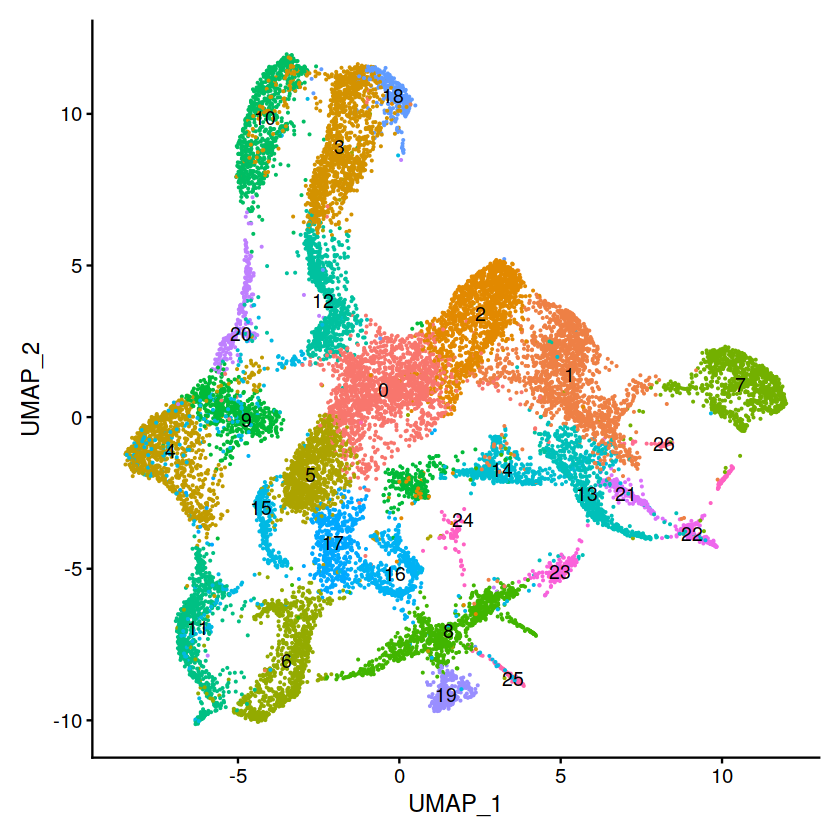

In [20]:
cd34 <- RunUMAP(object = cd34, reduction = 'lsi', dims = 2:30)
cd34 <- FindNeighbors(object = cd34, reduction = 'lsi', dims = 2:30)
cd34 <- FindClusters(object = cd34, verbose = FALSE, algorithm = 3)
DimPlot(object = cd34, label = TRUE) + NoLegend()

In [21]:
saveRDS(cd34, file.path(outdir, "granja_10X_CD34.rds"))

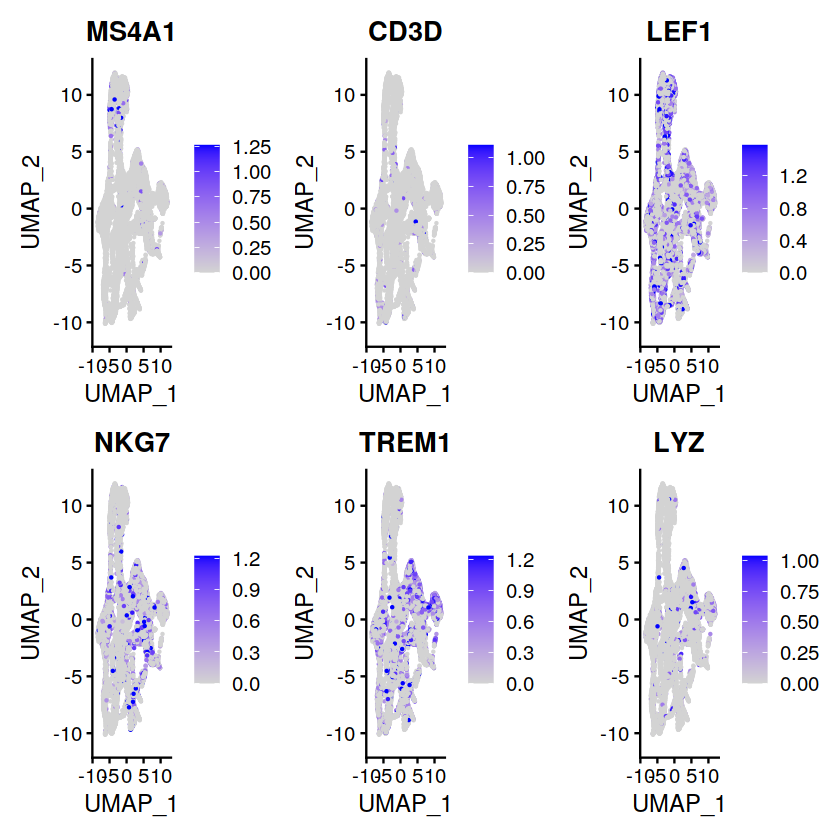

In [22]:
DefaultAssay(cd34) <- 'RNA'

FeaturePlot(
  object = cd34,
  features = c('MS4A1', 'CD3D', 'LEF1', 'NKG7', 'TREM1', 'LYZ'),
  pt.size = 0.2,
  max.cutoff = 'q95',
  ncol = 3
)

In [24]:
sessionInfo()

R version 4.0.2 (2020-06-22)
Platform: x86_64-conda_cos6-linux-gnu (64-bit)
Running under: Ubuntu 18.04.5 LTS

Matrix products: default
BLAS/LAPACK: /data/isshamie/software/anaconda3/envs/mito_trace/lib/libopenblasp-r0.3.12.so

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] stats4    parallel  stats     graphics  grDevices utils     datasets 
[8] methods   base     

other attached packages:
 [1] tidyr_1.1.3               Matrix_1.3-4             
 [3] readr_1.4.0               magrittr_2.0.1           
 [5] umap_0.2.7.0              dplyr_1.0.6              
 [7] data.table_1.14.0         SeuratObject_4.0.2       
 [9] Seurat_4.0.2              Si